# imports 

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import unicodedata
import re
import wrangle 
from importlib import reload

from wordcloud import WordCloud

# Wrangle
- Load the README data set.

In [94]:
reload(wrangle)

<module 'wrangle' from '/Users/sinao/codeup-data-science/nlp_project/wrangle.py'>

In [95]:
df = wrangle.get_search_csv()


In [96]:
df.iloc[203].dropna()

Unnamed: 0                             203
repo          gbrunner/Courtside-Geography
language                              HTML
Name: 203, dtype: object

In [97]:
df.isna().sum()

Unnamed: 0         0
repo               0
language           6
readme_contents    9
dtype: int64

In [98]:
df = wrangle.prep_text(df)

# Explore
* created function to *flatten* the languages into less categories
    - went from 21 categories down to 6

In [99]:
language_freq = df.language.value_counts()
    
#quick takeaway --> lets combine those with 3 or less into other
#we can then backport the code to the wrangle portion
language_freq.size

6

In [100]:
def flatten_languages(language):

    keepers = ['Python', 'R', 'JavaScript', 'Jupyter Notebook', 'HTML']
    
    if language not in keepers:
        language = 'Other'

    return language

In [101]:
df.language = df.language.apply(flatten_languages)

In [102]:
df.language.value_counts()

Python              55
Other               44
R                   30
JavaScript          21
Jupyter Notebook    19
HTML                14
Name: language, dtype: int64

## Univariate
- histogram of langauges, 
- value counts of words by langauge ?

<AxesSubplot:>

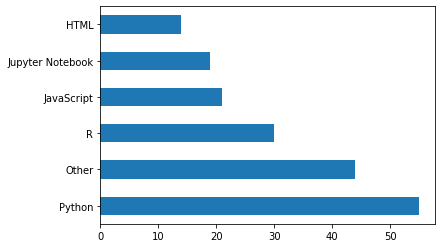

In [103]:
df.language.value_counts().plot.barh()

Create and explore bigrams for the README data.

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 208
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   language    183 non-null    object 
 1   lemmatized  183 non-null    object 
 2   word_count  183 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.8+ KB


In [133]:
#created class in order to facilitate bigram and trigram creation
class code_language:
  def __init__(self, words, label:str):
    self.words = words
    self.label = label

  def whole_words(self): 
    return pd.Series(self.words.split())

  def word_counts(self):
    return pd.Series(self.words.split()).value_counts()

  def bigrams(self):
    return pd.Series(list(nltk.bigrams(self.words.split())))

  def trigrams(self):
    return pd.Series(list(nltk.ngrams(self.words.split(), 3)))


In [134]:
html = code_language(words=' '.join(df[df.language == 'HTML'].lemmatized), label='html')

In [123]:
html.bigrams()

0       (basketball, referencehttpwwwbasketballreferen...
1         (referencehttpwwwbasketballreferencecom, great)
2                                           (great, site)
3                                      (site, especially)
4                                (especially, basketball)
                              ...                        
4290    (httpsgbrunnergithubiocourtjsmakesvsmissed3d, ...
4291                                  (jupyter, notebook)
4292                                    (notebook, slide)
4293                                    (slide, revealjs)
4294    (revealjs, httpgbrunnergithubiocourtsidegeogra...
Length: 4295, dtype: object

In [124]:
# this initilizes the class objects. 
html = code_language(words=' '.join(df[df.language == 'HTML'].lemmatized), label='html')
jupyter = code_language(words=' '.join(df[df.language == 'Jupyter Notebook'].lemmatized), label='jupyter')
javascript = code_language(words=' '.join(df[df.language == 'JavaScript'].lemmatized), label='javascript')
r_ = code_language(words=' '.join(df[df.language == 'R'].lemmatized), label='r')
other_ = code_language(words=' '.join(df[df.language == 'Other'].lemmatized), label='other')
python_ = code_language(words=' '.join(df[df.language == 'Python'].lemmatized), label='python')


In [125]:
#this will join all the entire text column for entries labled ham
# runs them through  function
# html_words = ' '.join(df[df.language == 'HTML'].lemmatized)
# jupyter_words = ' '.join(df[df.language == 'Jupyter Notebook'].lemmatized)
# javascript_words =  ' '.join(df[df.language == 'JavaScript'].lemmatized)
# r_words =  ' '.join(df[df.language == 'R'].lemmatized)
# other_words =  ' '.join(df[df.language == 'Other'].lemmatized)
# python_words =  ' '.join(df[df.language == 'Python'].lemmatized)
# html_bigrams = pd.Series(list(nltk.bigrams(html_words)))
# jupyter_bigrams = pd.Series(list(nltk.bigrams(jupyter_words)))
# javascript_bigrams = pd.Series(list(nltk.bigrams(javascript_words)))
# r_bigrams = pd.Series(list(nltk.bigrams(r_words)))
# other_bigrams = pd.Series(list(nltk.bigrams(other_words)))
# python_bigrams = pd.Series(list(nltk.bigrams(python_words)))
# html_trigrams = pd.Series(list(nltk.ngrams(html_words.split(), 3)))
# jupyter_trigrams = pd.Series(list(nltk.ngrams(jupyter_words.split(), 3)))
# javascript_trigrams = pd.Series(list(nltk.ngrams(javascript_words.split(), 3)))
# r_trigrams = pd.Series(list(nltk.ngrams(r_words.split(), 3)))
# other_trigrams = pd.Series(list(nltk.ngrams(other_words.split(), 3)))
# python_trigrams = pd.Series(list(nltk.ngrams(python_words.split(), 3)))

In [126]:
languages = [html, jupyter, javascript, r_, other_, python_]

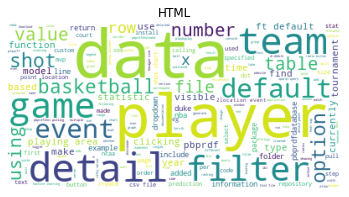

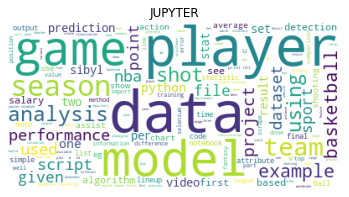

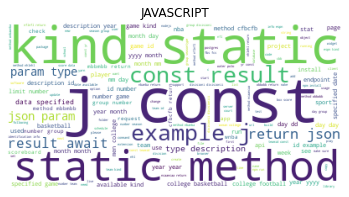

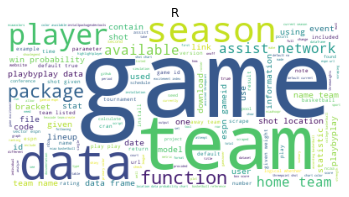

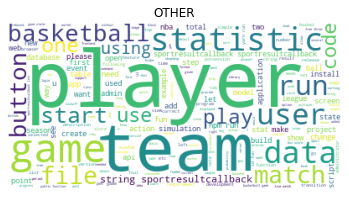

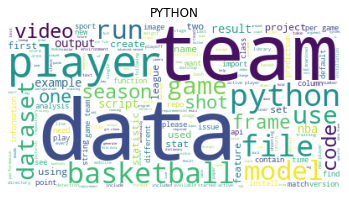

In [127]:
# iterates over the languages and creates a word cloud for each one 
for language in languages:
    
    #the words themselves can be accessed with dot notation on the object. same with the label
    img = WordCloud(background_color='white')\
        .generate(language.words)

    plt.imshow(img)
    plt.axis('off')
    plt.title(language.label.upper())
    plt.show()
    
    



 Visualize them with a word cloud. How do they compare with the ham bigrams?


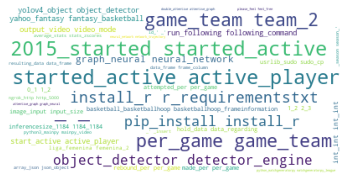

In [128]:

for language in languages:
    img = WordCloud(background_color='white', collocation_threshold=3, collocations=True)\
        .generate(' '.join(language.bigrams().apply('_'.join)))\
        #.generate(' ' .join(pd.Series(list(ham_words))))

    plt.imshow(img)
    plt.axis('off')

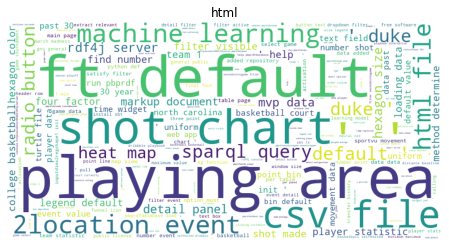

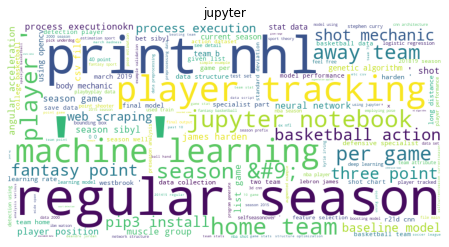

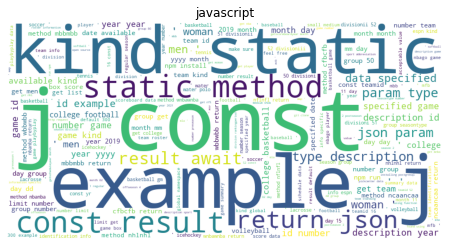

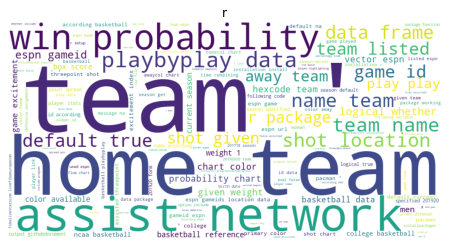

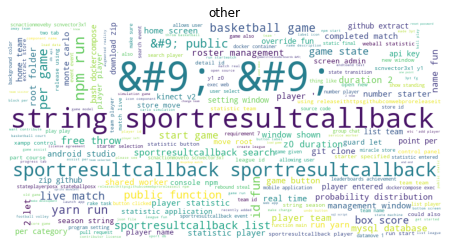

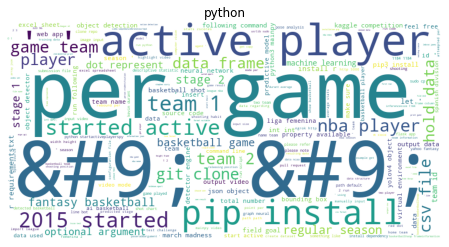

In [129]:
for language in languages:
    data = {' '.join(k): v for k, v in language.bigrams()
                                        .value_counts()
                                        .to_dict()
                                        .items()}
    img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
    plt.figure(figsize=(8, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(language.label)
    plt.show()

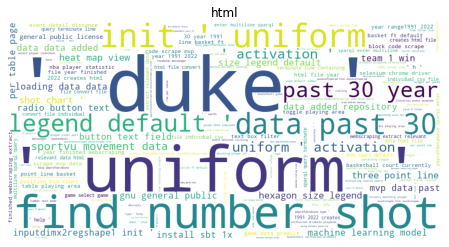

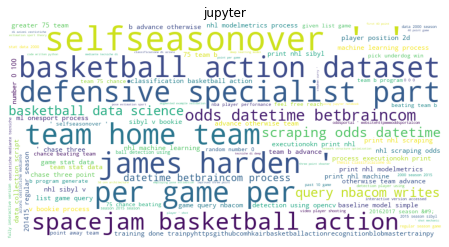

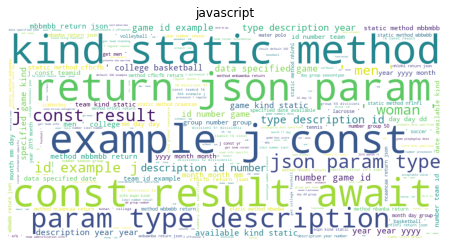

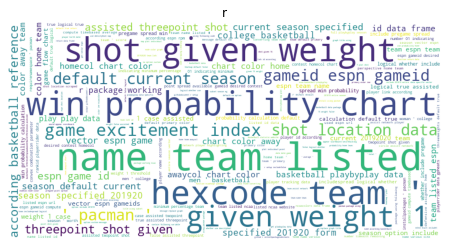

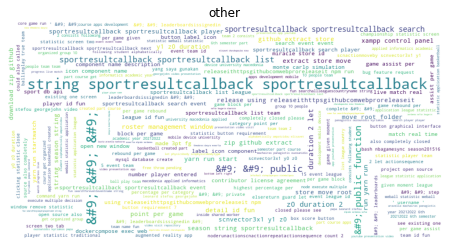

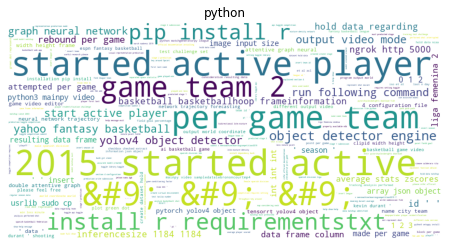

In [130]:
for language in languages:
    data = {' '.join(k): v for k, v in language.trigrams()
                                        .value_counts()
                                        .to_dict()
                                        .items()}
    img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
    plt.figure(figsize=(8, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(language.label)
    plt.show()

In [135]:
html.word_counts()

'                                                                                             133
data                                                                                           62
detail                                                                                         49
default                                                                                        48
player                                                                                         46
                                                                                             ... 
draganddrop                                                                                     1
reorder                                                                                         1
eye                                                                                             1
delete                                                                                          1
httpgbrunnergithubio